## Import packages

In [1]:
%matplotlib inline
import math
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from CFModel import CFModel
from CFModel import DeepModel

/Users/joujun/.pyenv/versions/2.7.10/envs/please_my_fridge/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Define constants

In [2]:
RATINGS_CSV_FILE = './input/rating_result.csv'
MODEL_WEIGHTS_FILE = 'recipe_weights.h5'
K_FACTORS = 120
RNG_SEED = 144653

## Load Recipe data

In [3]:
ratings = pd.read_csv(RATINGS_CSV_FILE, 
                      sep=',', 
                      encoding='utf-8', 
                      usecols=['id','userid', 'recipeid', 'rating'])
max_userid = ratings['userid'].max() + 1
max_recipeid = ratings['recipeid'].max() + 1
print len(ratings), 'ratings loaded.'

1048575 ratings loaded.


## Create training set

In [4]:
shuffled_ratings = ratings.sample(frac=1., random_state=RNG_SEED)
Users = shuffled_ratings['userid'].values
print 'Users:', Users, ', shape =', Users.shape
Recipe = shuffled_ratings['recipeid'].values
print 'Recipes:', Recipe, ', shape =', Recipe.shape
Ratings = shuffled_ratings['rating'].values
print 'Ratings:', Ratings, ', shape =', Ratings.shape

Users: [ 3579 10010  4542 ... 11751  6257  8880] , shape = (1048575,)
Recipes: [1952 1112 1449 ... 2014  661 1691] , shape = (1048575,)
Ratings: [5 5 5 ... 5 5 5] , shape = (1048575,)


## Define model

In [5]:
model = DeepModel(max_userid, max_recipeid, K_FACTORS)
model.compile(loss='mse', optimizer='adamax')

CFModel.py:40: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  self.add(Merge([P, Q], mode='concat'))


## Train model

In [6]:
callbacks = [EarlyStopping('val_loss', patience=2),
             ModelCheckpoint(MODEL_WEIGHTS_FILE, save_best_only=True)]
history = model.fit([Users, Recipe], Ratings, nb_epoch=30, validation_split=.1, verbose=1, callbacks=callbacks)

/Users/joujun/.pyenv/versions/2.7.10/envs/please_my_fridge/lib/python2.7/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 943717 samples, validate on 104858 samples
Epoch 1/30
 46080/943717 [>.............................] - ETA: 14:11 - loss: 1.1024

KeyboardInterrupt: 

## Plot training and validation RMSE

/Users/joujun/.pyenv/versions/2.7.10/envs/please_my_fridge/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


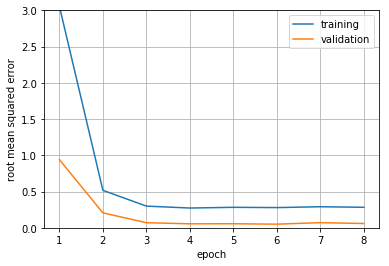

In [117]:
loss = pd.DataFrame({'epoch': [ i + 1 for i in history.epoch ],
                     'training': [ math.sqrt(loss) for loss in history.history['loss'] ],
                     'validation': [ math.sqrt(loss) for loss in history.history['val_loss'] ]})
#ax = loss.ix[:,:].plot(x='epoch', figsize={1,30}, grid=True)
ax = loss.ix[:,:].plot(x='epoch', grid=True)
ax.set_ylabel("root mean squared error")
ax.set_ylim([0.0,3.0]);